In [84]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import pylab as pl
from IPython import display
import pandas as pd
import sys
%matplotlib inline

In [85]:
def getFeatures(df):
    window_size = 1000
    total_batch = int(len(df)/window_size)
    trainX = pd.DataFrame()
    # Loop over all batches
    for i in range(total_batch):
        n = min(window_size, len(df)-i*window_size)
        df_win = df[i*window_size:i*window_size+n]
        group = df_win.groupby(['SrcAddr'])
        train_win = group.Sport.nunique()
        train_win = pd.DataFrame(train_win)
        train_win['udest_ip'] = group.DstAddr.nunique()
        train_win['udest_port'] = group.Dport.nunique()
        train_win['netflows'] = group.Dport.count()
        temp = pd.get_dummies(group.first()['Proto'])
        train_win['tcp'] = temp.tcp
        train_win['udp'] = temp.udp
        train_win['bytes'] = group.TotBytes.sum()
        train_win['packets'] = group.TotPkts.sum()
        train_win['Label'] = (group.Label.sum()*1.0/group.Dport.count())> 0
        trainX = pd.concat([trainX,train_win],axis=0)    
    return trainX

In [94]:
import random

def somerows(x, n):
    return x.sample(n=n)

def selectFlows(filename):
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    dft = getFeatures(df)
    dfB = dft[dft['Label'] == True]
    dfN = dft[dft['Label'] == False]
    dfN = somerows(dfN,len(dfB))
#     print len(dfB)
#     print len(dfN)
    df = pd.concat([dfB,dfN],axis=0)   
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [95]:
dfTrain = pd.DataFrame()
# df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/3/capture20110812.binetflow")
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/4/capture20110815.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/5/capture20110815-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/7/capture20110816-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
print len(dfTrain)
# df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/10/capture20110818.binetflow")
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/11/capture20110818-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/12/capture20110819.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/13/capture20110815-3.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Training.biargus.binetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
    
print len(dfTrain)

762
5024


In [96]:
dfTest = pd.DataFrame()
# df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/1/capture20110810.binetflow")
# dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/2/capture20110811.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
# df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/3/capture20110812.binetflow")
# dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/6/capture20110816.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/8/capture20110816-3.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/9/capture20110817.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0)


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Testing.biargus.binenetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTest = pd.concat([dfTest,df1],axis=0) 

print len(dfTest)

28262


In [97]:
def getXY(df):
    temp = pd.get_dummies(df.Label)
    temp = pd.DataFrame(temp)
    Y = temp.as_matrix()
    X = df.copy()
    del X['Label']
    X = (X - X.mean()) / (X.max() - X.min())
    X = X.as_matrix()
    return X,Y

In [98]:
trainX, trainY = getXY(dfTest)

testX, testY = getXY(dfTrain)

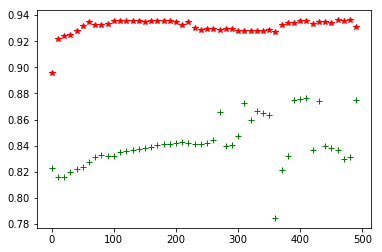

Iteration: 490 Loss: 0.104501568266 Train Accuracy: 0.930861 Test Accuracy: 0.875 Optimization Finished!
('Accuracy:', 0.83499205)


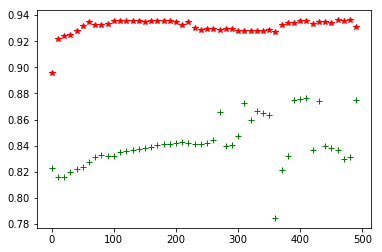

In [101]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer


#Parameters
learning_rate = 0.001
training_epochs = 500
batch_size = 100
display_step = 10

#Betwork Parameters
n_hidden_1 = 40
n_hidden_2 = 20
n_hidden_3 = 10
n_input = 8
n_classes = 2
# tf Graph input
x = tf.placeholder("float", [None, n_input],'x')
y = tf.placeholder("float", [None, n_classes],'y')
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1]),name='wh1'),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='wh2'),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3]),name='wh3'),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]),name='wo')
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.random_normal([n_hidden_2]),name='b2'),
    'b3': tf.Variable(tf.random_normal([n_hidden_3]),name='b3'),
    'out': tf.Variable(tf.random_normal([n_classes]),name='bo')
}
    # Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Initializing the variables
init = tf.initialize_all_variables()

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
# Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(trainX)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            n = min(batch_size, len(trainX)-i*batch_size)
            batch_x = trainX[i*batch_size:i*batch_size+n]
            batch_y = trainY[i*batch_size:i*batch_size+n]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            # Calculate batch accuracy
            Train_accuracy = accuracy.eval({x: trainX, y: trainY})
            # Calculate batch loss
            loss = avg_cost
            #testX = testX.reshape(-1,seq_max_len,n_input)
            Test_accuracy=accuracy.eval({x: testX, y: testY})    
            #pl.plot([epoch],loss,'b.',)
            pl.plot([epoch],Train_accuracy,'r*',)
            pl.plot([epoch],Test_accuracy,'g+')
            display.clear_output(wait=True)
            display.display(pl.gcf())   
            sys.stdout.flush()
            print("\rIteration: %s Loss: %s Train Accuracy: %s Test Accuracy: %s"%(epoch,loss,Train_accuracy,Test_accuracy)),
            sys.stdout.flush()
    print("Optimization Finished!")
    
    print("Accuracy:", accuracy.eval({x: testX, y: testY}))
    prediction=tf.argmax(pred,1)
    out =  prediction.eval(feed_dict={x: testX})

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(out, np.argmax(testY,1)) #0 = normal

array([[2149,  466],
       [ 363, 2046]])